# SciPy를 사용한 기초적인 검정

- 실제로는 t검정을 주로 쓴다. z검정은 잘 안 쓴다.
- 등분산은 표준편차로 비교하는 건가?

SciPy 파이썬 패키지는 다음과 같은 다양한 검정 명령을 제공한다.

* 이항 검정 (Binomial test)
* 카이 제곱 검정 (Chi-square test)
* 단일 표본 z-검정 (One-sample z-test)
* 단일 표본 t-검정 (One-sample t-test)
* 독립 표본 t-검정 (Independent-two-sample t-test)
* 대응 표본 t-검정 (Paired-two-sample t-test)
* 분산 검정 (Chi squared variance test)
* 등분산 검정 (Equal-variance test)
* 정규성 검정 (Normality test)

## 이항 검정 (Binomial test)

이항 검정은 이항 분포를 이용하여 Bernoulli 분포 모수 $\theta$에 대한 가설을 조사하는 검정 방법이다. SciPy stats 서브패키지의 `binom_test` 명령을 사용한다. 디폴트 귀무 가설은 $\theta = 0.5$이다.

* scipy.stats.binom_test
  * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom_test.html

데이터 갯수 $N=10$, 실제 모수 $\theta_0=0.5$인 경우 대해 이항 검정 명령을 실시해 보자.

In [1]:
N = 10
theta_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

7

In [2]:
sp.stats.binom_test(n ,N)

0.34374999999999989

유의 확률(p-value)이 34%로 높으므로 귀무 가설을 기각할 수 없다. 따라서 $\theta=0.5$이다.

데이터 갯수 $N=100$, 실제 모수 $\theta_0=0.5$인 경우 대해 이항 검정 명령을 실시해 보자.

In [3]:
N = 100
theta_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

49

In [4]:
sp.stats.binom_test(n, N)

0.92041076261282062

유의 확률(p-value)이 92%로 높으므로 귀무 가설을 기각할 수 없다. 따라서 $\theta=0.5$이다.

데이터 갯수 $N=100$, 실제 모수 $\theta_0=0.35$인 경우 대해 이항 검정 명령을 실시해 보자.

In [7]:
N = 100
theta_0 = 0.35
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

31

In [8]:
sp.stats.binom_test(n, N)

0.00018314322488235352

유의 확률(p-value)이 0.018%로 낮으므로 귀무 가설을 기각할 수 있다. 따라서 $\theta \neq 0.5$이다.

## 카이 제곱 검정 (Chi-square test)

카이 제곱 검정은 goodness of fit 검정이라고도 부른다. 카테고리 분포의 모수 $\theta=(\theta_1, \ldots, \theta_K)$에 대한 가설을 조사하는 검정 방법이다. SciPy stats 서브패키지의 `chisquare` 명령을 사용한다. 디폴트 귀무 가설은 $\theta = \left(\frac{1}{K}, \ldots, \frac{1}{K} \right)$이다.

* scipy.stats.chisquare
  * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html   

데이터 갯수 $N=10$, 실제 모수 $\theta_0=(0.25, 0.25, 0.25, 0.25)$인 경우 대해 카이 제곱 검정 명령을 실시해 보자.

In [9]:
N = 10
K = 4
theta_0 = np.ones(K) / K
np.random.seed(0)
x = np.random.choice(K, N, p=theta_0)
n = np.bincount(x, minlength=K)
n

array([0, 3, 5, 2], dtype=int64)

In [10]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=5.1999999999999993, pvalue=0.157724450396663)

유의 확률(p-value)이 17.8%로 높으므로 귀무 가설을 기각할 수 없다. 따라서 $\theta_0=(0.25, 0.25, 0.25, 0.25)$이다.

데이터 갯수 $N=100$, 실제 모수 $\theta_0=(0.35, 0.30, 0.20, 0.15)$인 경우 대해 카이 제곱 검정 명령을 실시해 보자.

In [11]:
N = 100
K = 4
theta_0 = np.array([0.35, 0.3, 0.2, 0.15])
np.random.seed(0)
x = np.random.choice(K, N, p=theta_0)
n = np.bincount(x, minlength=K)
n

array([37, 32, 20, 11], dtype=int64)

In [12]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=16.559999999999999, pvalue=0.00087034719789121269)

유의 확률(p-value)이 0.087%이므로 귀무 가설을 기각할 수 있다. 따라서 $\theta \neq (0.35, 0.3, 0.2, 0.15))$이다.

## 단일 표본 z-검정 (One-sample z-test)

단일 표본 z-검정은 분산 $\sigma^2$의 값을 정확히 알고 있는 정규 분포의 표본에 대해 기댓값을 조사하는 검정방법이다. 단일 표본 z-검정의 경우에는 SciPy에 별도의 함수가 준비되어 있지 않으므로 `norm` 명령의 `cdf` 메서드를 사용하여 직접 구현해야 한다. fit=sp.stats.norm()가 없다. 클래스라서

* scipy.stats.norm
  * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

데이터 갯수 $N=10$, 실제 모수 $\mu_0=0$인 경우 대해 단일 표본 z-검정 명령을 실시해 보자.

In [13]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [14]:
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean() - mu) / np.sqrt(sigma2 / len(x))
    return z, 2 * sp.stats.norm().sf(np.abs(z))

In [15]:
ztest_1samp(x)

(2.3338341854824276, 0.019604406021683538)

유의 확률(p-value)이 1.96%이므로 만약 유의 수준이 5% 이상 이라면 귀무 가설을 기각할 수 있다. 따라서 $\mu \neq 0$이다. 이 경우는 검정 결과가 오류인 예라고 볼 수 있다. 검정 결과가 오류로 나온 이유는 데이터 수가 10개로 부족하기 때문이다.

오류의 유형 중에서 이러한 오류는 귀무 가설이 진실임에도 불구하고 거짓으로 나온 경우로 **유형 1 오류(Type 1 Error)**라고 한다.

데이터 갯수 $N=100$, 실제 모수 $\mu_0=0$인 경우 대해 단일 표본 z-검정 명령을 실시해 보자.

In [16]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)

In [17]:
ztest_1samp(x)

(0.59808015534484993, 0.54978645086241684)

유의 확률(p-value)이 54.98%이므로 귀무 가설을 기각할 수 없다. 따라서 $\mu = 0$이다. 

## 단일 표본 t-검정 (One-sample t-test)

단일 표본 t-검정은 정규 분포의 표본에 대해 기댓값을 조사하는 검정방법이다. SciPy의 stats 서브 패키지의 `ttest_1samp` 명령을 사용한다.  `ttest_1samp` 명령의 경우에는 디폴트 모수가 없으므로 `popmean` 인수를 사용하여 직접 지정해야 한다.


* scipy.stats.ttest_1samp
   * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

데이터 갯수 $N=10$, 실제 모수 $\mu_0=0$인 경우 대해 단일 표본 t-검정 명령을 실시해 보자.

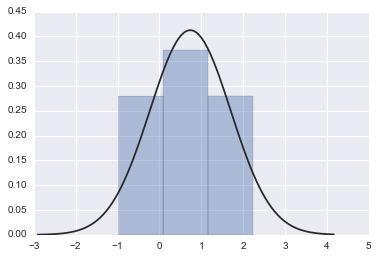

In [18]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

In [19]:
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=2.2894396723896699, pvalue=0.047818464908570578)

유의 확률(p-value)이 4.78%이므로 만약 유의 수준이 5% 이상 이라면 귀무 가설을 기각할 수 있다. 따라서 $\mu \neq 0$이다. 이 경우는 검정 결과가 오류인 예라고 볼 수 있다. 검정 결과가 오류로 나온 이유는 데이터 수가 10개로 부족하기 때문이다.

- 아까는 분산 크기를 정확히 알고 있었으니까
- 지금은 분산도 모르니까 뮤값도 정확도가 떨어져서 p-value도 정확도가 떨어진다.
- 그래서 두루뭉술하게 0.4 몇퍼센트가 나온 것이다.

데이터 갯수 $N=100$, 실제 모수 $\mu_0=0$인 경우 대해 단일 표본 t-검정 명령을 실시해 보자.

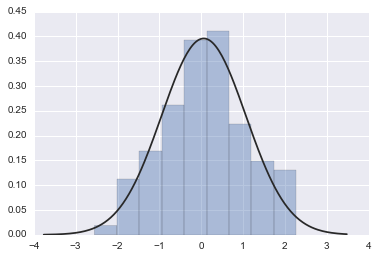

In [22]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

In [24]:
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=0.59042834028516977, pvalue=0.55624891586946745)

유의 확률(p-value)이 55.62%이므로 귀무 가설을 기각할 수 없다. 따라서 $\mu = 0$이다. 

## 독립 표본 t-검정 (Independent-two-sample t-test)

- 2개의 반이 서로 평균이 누가 더 나은가 내기할 때
- 2개를 원래 다르게 넣었는데. 같다고 나왔으니까 오류. 오류2의 경우에는 참이 아닌 거짓인데 참으로 나온 오류

독립 표본 t-검정(Independent-two-sample t-test)은 간단하게 two sample t-검정이라고도 한다. 두 개의 독립적인 정규 분포에서 나온 두 개의 데이터 셋을 사용하여 두 정규 분포의 기댓값이 동일한지를 검사한다. SciPy stats 서브패키지의 `ttest_ind` 명령을 사용한다. 독립 표본 t-검정은 두 정규 분포의 분산값이 같은 경우와 같지 않은 경우에 사용하는 검정 통계량이 다르기 때문에  `equal_var` 인수를 사용하여 이를 지정해 주어야 한다.

* scipy.stats.ttest_ind
   * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

두 정규 분포의 기댓값이 $\mu_1 = 0$, $\mu_2 = 0.5$으로 다르고  분산은 $\sigma_1 = \sigma_2 = 1$ 으로 같으며 샘플의 수가 $N_1=N_2=10$인 경우를 실행해 보자

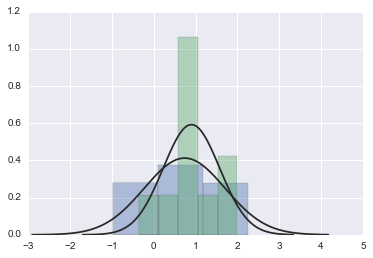

In [27]:
N_1 = 10; mu_1 = 0; sigma_1 = 1
N_2 = 10; mu_2 = 0.5; sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [28]:
sp.stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=-0.41399685269886549, pvalue=0.68376768941164268)

유의 확률(p-value)이 68.4%이므로 귀무 가설을 기각할 수 없다. 따라서 $\mu_1 = \mu_2$이다. 이 경우는 검정 결과가 오류인 예라고 볼 수 있다. 

오류의 유형 중에서 이러한 오류는 귀무 가설이 거짓임에도 불구하고 진실로 나온 경우로 **유형 2 오류(Type 2 Error)**라고 한다.

데이터 수가 증가하면 이러한 오류가 발생할 가능성이 줄어든다.

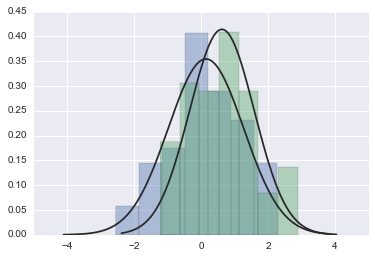

In [29]:
N_1 = 50; mu_1 = 0; sigma_1 = 1
N_2 = 100; mu_2 = 0.5; sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [30]:
sp.stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=-2.6826951236616963, pvalue=0.0081339709157226582)

데이터의 갯수를 50개와 100개로 증가시킨 경우에 유의 확률은 0.8%로 감소하였다. 따라서 두 확률 분포의 기댓값이 일치한다는 귀무 가설은 기각할 수 있다.

## 대응 표본 t-검정 (Paired-two-sample t-test)

- 약을 복용하기 전과 후에 어떻게 이동했는지 살펴보기 위해서. 1:1 매칭으로
- N이 비록 5라고 하더라도 1:1매칭이기 때문에 하나의 샘플로 여러 번 했다고 할 수 있다. 그래서 확률이 높다.

대응 표본 t-검정은 독립 표본 t-검정을 두 집단의 샘플이 1대1 대응하는 경우에 대해 수정한 것이다. 즉, 독립 표본 t-검정과 마찬가지로 두 정규 분포의 기댓값이 같은지 확인하기 위한 검정이다.

예를 들어 어떤 반의 학생들이 특강을 수강하기 전과 수강한 이후에 각각 시험을 본 시험 점수의 경우에는 같은 학생의 두 점수는 대응할 수 있다. 이 대응 정보를 알고 있다면 보통의 독립 표본 t-검정에서 발생할 수 있는 샘플간의 차이의 영향을 없앨 수 있기 때문에 특강 수강의 영향을 보다 정확하게 추정할 수 있다.

* scipy.stats.ttest_rel
   * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

$\mu_1 = 0$, $\mu_2 = 0.5$로 평균이 달라진 경우에 대해 대응 표본 t-검정을 실시해 보자. 데이터 갯수 $N$은 5 이다.

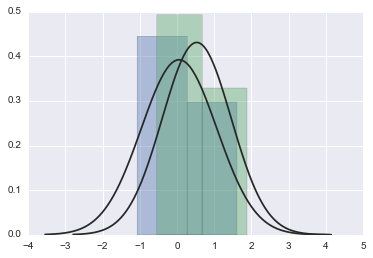

In [31]:
N = 5
mu_1 = 0
mu_2 = 0.5
np.random.seed(1)
x1 = sp.stats.norm(mu_1).rvs(N)
x2 = x1 + sp.stats.norm(mu_2, 0.1).rvs(N)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [32]:
sp.stats.ttest_rel(x1, x2)

Ttest_relResult(statistic=-7.1723380661732756, pvalue=0.0020008849290622677)

5 개의 데이터만으로도  두 평균이 다르다는 것을 유의 확률(p-value) 0.2%의 정확도로 알아내었음을 확인할 수 있다.

## 카이 제곱 분산 검정 (Chi-Square Test for the Variance)

- 이번에는 분산으로. 기존에는 기댓값으로. 
- 사실 분산을 가지고 테스팅 하는 경우는 잘 없다.
- 평균값은 많이 왔다갔다 할 수 있는데 분산은 잘 변하지 않는다. 언제 특히 안 변하냐? 수익률 자체는 변하기 쉽지만 폭은 잘 변하지 않는다.
- 그래서 좋은 점은 데이터를 많이 모을 수 있다. 그래서 mean값 보다 더 정확해 질 수 있다. 많기 때문에

지금까지는 정규 분포의 기댓값을 비교하는 검정을 살펴보았다. 이제는 정규 분포의 분산에 대해 살펴보자.

카이 제곱 분산 검정(Chi-Square Test for the Variance)은 정규 분포의 샘플 분산 값은 정규화 하면 카이 제곱 분포를 따른다는 점을 이용하는 검정 방법이다.

그러나 SciPy는 카이 제곱 분산 검정에 대한 명령이 없으므로 `chi2` 클래스를 사용하여 직접 구현해야 한다.

In [39]:
def chi2var_test(x, sigma2=1):
    v = x.var(ddof=1)
    t = (len(x) - 1)*v/sigma2
    return t, sp.stats.chi2(df=len(x)-1).sf(np.abs(t))

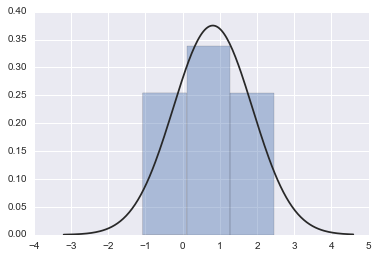

1.0637871321863899

In [40]:
N = 10
mu_0 = 0
sigma_0 = 1.1
np.random.seed(0)
x = sp.stats.norm(mu_0, sigma_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()
x.std()

In [41]:
chi2var_test(x)

(11.316430626053437, 0.25464123584764531)

## 등분산 검정 (Equal-variance test)

- 두 샘플 뽑고 비교하는 것은 명령어가 존재한다.
- 실제로 F분포는 더 안 쓴다. 그래서 사람들이 만들어 놓은 다른 테스트로 쓴다.
- sp.stats.levene(x1, x2)를 쓰는 것이 가장 좋다. 가장 p-value가 낮게 나오기 때문에 정확하다? 여기서는 귀무가설이 거짓이기 때문

등분산 검정은 두 정규 분포로부터 생성된 두 개의 데이터 집합으로부터 두 정규 분포의 분산 모수가 같은지 확인하기 위한 검정이다. 가장 기본적인 방법은 F분포를 사용하는 것이지만 실무에서는 이보다 더 성능이 좋은 bartlett, fligner, levene 방법을 주로 사용한다. SciPy의 stats 서브패키지는 이를 위한  `bartlett`, `fligner`, `levene` 명령을 제공한다.

* scipy.stats.bartlett
  * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html
* scipy.stats.fligner
  * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fligner.html
* scipy.stats.levene
  * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html   

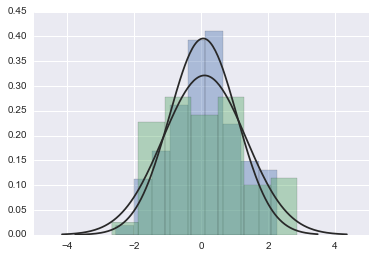

(1.0078822447165796, 1.2416003969261071)

In [42]:
N1 = 100
N2 = 100
sigma_1 = 1
sigma_2 = 1.2
np.random.seed(0)
x1 = sp.stats.norm(0, sigma_1).rvs(N1)
x2 = sp.stats.norm(0, sigma_2).rvs(N2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()
x1.std(), x2.std()

In [43]:
sp.stats.bartlett(x1, x2)

BartlettResult(statistic=4.2534738372322662, pvalue=0.039170128783651344)

In [44]:
sp.stats.fligner(x1, x2)

FlignerResult(statistic=7.2248419904094572, pvalue=0.0071901501067483673)

In [45]:
sp.stats.levene(x1, x2)

LeveneResult(statistic=7.6807089476794372, pvalue=0.0061135154970207925)

## 정규성 검정

- 오차를 찌꺼기라고 한다. 잔차라고 한다. 그 찌꺼기가 정규분포가 되어야 한다.
- 그래서 명령어가 되게 많다. Omnibus Normality test, Jarque–Bera test, Kolmogorov-Smirnov test, Lilliefors test (stats 모델)
- Q-Q플롯의 확장이다.

회귀 분석 등에서는 확률 분포가 가우시안 정규 분포를 따르는지 아닌지를 확인하는 것이 중요하다. 이러한 검정을 정규성 검정(normality test)이라고 한다. 정규성 분포 그 중요도 만큼 여러가지 검정 방법들이 개발되어 있으며 Scipy 패키지 이외에도 statsmodels 패키지에도 다양한 정규성 검정 명령어를 제공한다. 

### statsmodels에서 제공하는 정규성 검정 명령어

* Omnibus Normality test
 * `statsmodels.stats.stattools.omni_normtest`
    * http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.stattools.omni_normtest.html

* Jarque–Bera test
 * `statsmodels.stats.stattools.jarque_bera`
   * http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.stattools.jarque_bera.html

* Kolmogorov-Smirnov test
 * `statsmodels.stats.diagnostic.kstest_normal`
   * http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.diagnostic.kstest_normal.html

* Lilliefors test
 * `statsmodels.stats.diagnostic.lillifors`
   * http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.diagnostic.lillifors.html


### SciPy 에서 제공하는 정규성 검정 명령어

* Kolmogorov-Smirnov test
 * `scipy.stats.ks_2samp`
   * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html

* Shapiro–Wilk test
 * `scipy.stats.shapiro`
   * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
     
* Anderson–Darling test
 * `scipy.stats.anderson`
   * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
 
* D'Agostino's K-squared test
 * `scipy.stats.mstats.normaltest`
   * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.normaltest.html

이 중에서 Kolmogorov-Smirnov 검정은 사실 정규 분포에 국한되지 않고 두 샘플이 같은 분포를 따르는지 확인할 수 있는 방법이다.

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


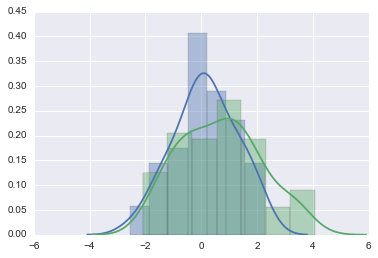

In [46]:
np.random.seed(0)
N1 = 50
N2 = 100
x1 = sp.stats.norm(0, 1).rvs(N1)
x2 = sp.stats.norm(0.5, 1.5).rvs(N2)
sns.distplot(x1)
sns.distplot(x2)
plt.show()

In [47]:
sp.stats.ks_2samp(x1, x2)

Ks_2sampResult(statistic=0.23000000000000004, pvalue=0.049516112814422863)

유의 확률이 4.95%로 만약 유의 수준이 5%라면 두 분포는 서로 다른 분포라고 볼 수 있다.